# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as cl
import os
from skimage import color, data, exposure, feature, filters, io, transform 

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

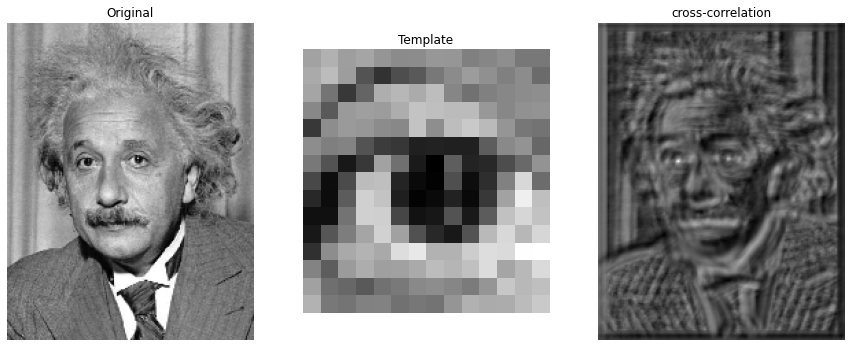

In [ ]:
# solution

#images
image=io.imread('/content/drive/MyDrive/CV4/images/einstein.png')
template=io.imread('/content/drive/MyDrive/CV4/images/template.png')
image = color.rgb2gray(image)
template = color.rgb2gray(template)

#location of the template
result = feature.match_template(image,template, pad_input=True)

#visualisation
fig, plots = plt.subplots(1,3, figsize=(15,7))
plots[0].imshow(image , cmap='gray')
plots[0].axis("off")
plots[0].set_title("Original")
plots[1].imshow(template , cmap='gray')
plots[1].axis("off")
plots[1].set_title("Template")
plots[2].imshow(result , cmap='gray')
plots[2].axis("off")
plots[2].set_title("cross-correlation")
fig.show()

*   What is the output of the normalized cross-correlation function?

**Solution**

With the normalized cross-correlation function we obtain the correlation between each block (with the size of the template) of the image and the template. This correlation can be calculated using the following formula:
$$h[m,n]=\frac{\sum_{k,l}(g[k,l]-\bar g)(f[m-k, n-l] - \bar f _{m,n})}{ \left( \sum_{k,l}(g[k,l]-\bar g)^2\sum_{k,l}(f[m-k, n-l] - \bar f _{m,n})^2\right )^{0.5}}$$
As we obtain a matrix of correlation, all values are between -1 and +1. The higher values correspond to the blocks with more correlation, thus the more similar which are the eyes.

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

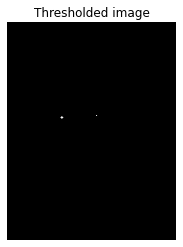

In [ ]:
# solution

#function
def bw(image):
  result = np.zeros(image.shape)
  for i in range(len(image)):
    for j in range(len(image[0])):
      if(image[i,j] >= 0.55):
        result[i,j] = 1
  return result

eyes = bw(result)
plt.imshow(eyes, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')
plt.show()

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

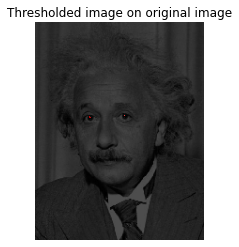

In [ ]:
# solution

plt.imshow(image, cmap='gray')
plt.imshow(eyes, cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plt.title('Thresholded image on original image')
plt.axis('off')
plt.show()

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

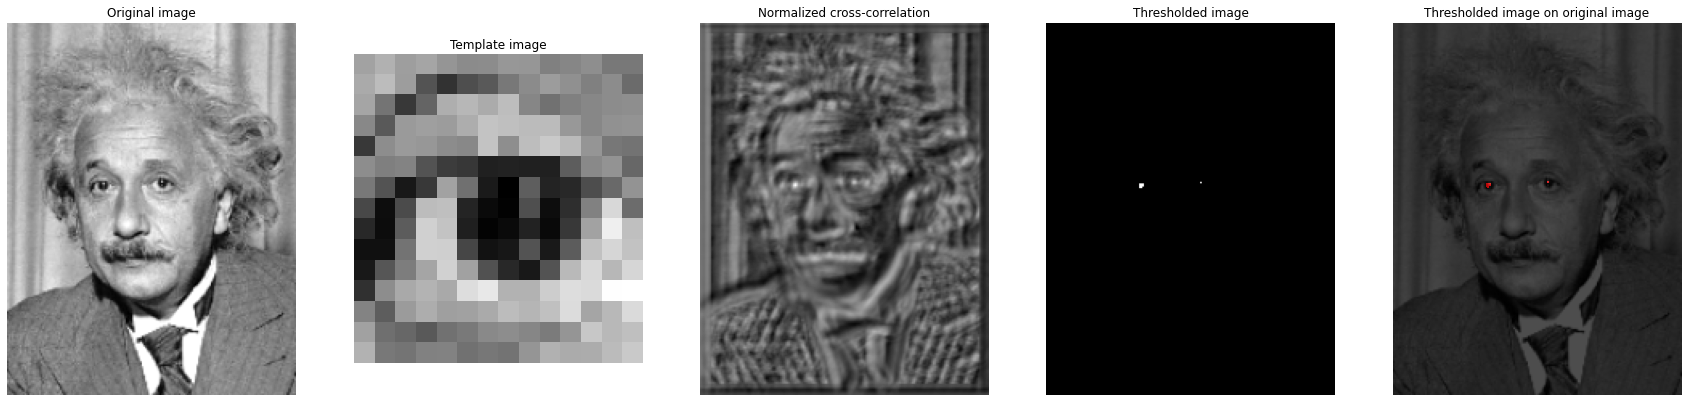

In [ ]:
# solution

#image
image=io.imread('/content/drive/MyDrive/CV4/images/einstein_br.png')
image = color.rgb2gray(image)

#matching
result = feature.match_template(image,template, pad_input=True)

#visualization
fig, plots = plt.subplots(1,5, figsize=(30,14))

#original
plots[0].imshow(image , cmap='gray')
plots[0].axis("off")
plots[0].set_title("Original image")

#template
plots[1].imshow(template , cmap='gray')
plots[1].axis("off")
plots[1].set_title("Template image")

#normalized cross-correlation
plots[2].imshow(result , cmap='gray')
plots[2].axis("off")
plots[2].set_title("Normalized cross-correlation")

#thresholded
plots[3].imshow(bw(result) , cmap='gray')
plots[3].axis("off")
plots[3].set_title("Thresholded image")

#thresholded on image
plots[4].imshow(image, cmap='gray')
plots[4].imshow(bw(result), cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[4].set_title('Thresholded image on original image')
plots[4].axis('off')

fig.show()

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

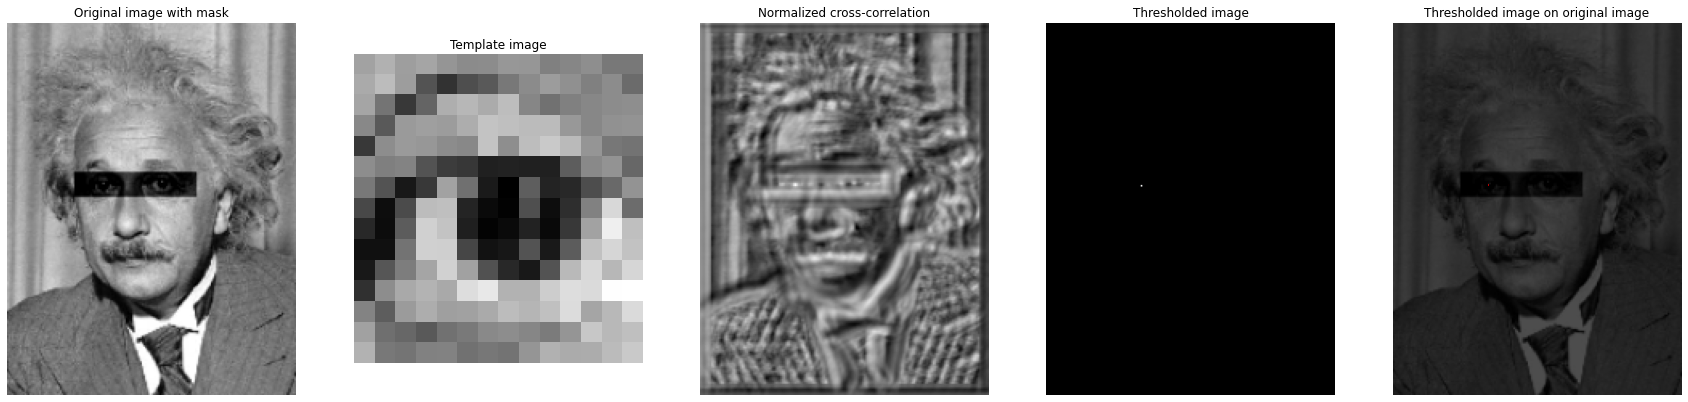

In [ ]:
# solution

#image
image =io.imread('/content/drive/MyDrive/CV4/images/einstein_mask.png')
image = color.rgb2gray(image)

#match
result = feature.match_template(image,template, pad_input=True)

#visualization
fig, plots = plt.subplots(1,5, figsize=(30,14))

#original
plots[0].imshow(image , cmap='gray')
plots[0].axis("off")
plots[0].set_title("Original image with mask")

#template
plots[1].imshow(template , cmap='gray')
plots[1].axis("off")
plots[1].set_title("Template image")

#Normalized cross-correlation
plots[2].imshow(result , cmap='gray')
plots[2].axis("off")
plots[2].set_title("Normalized cross-correlation")

#thresholded
plots[3].imshow(bw(result) , cmap='gray')
plots[3].axis("off")
plots[3].set_title('Thresholded image')

#thresholded on image
plots[4].imshow(image, cmap='gray')
plots[4].imshow(bw(result), cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[4].set_title('Thresholded image on original image')
plots[4].axis('off')

fig.show()

*   Do you find any differences in results with respect to contrast changes? 
*   Were you able to get the location of the template in all the above experiments? Explain your inferences.

**Solution**

We notice that in this exercise we a lighter and a darker image than the original. However, to calculate the correlations, we used the same template without changing its intencity.

With the brighter image we have been able to detect the eyes and in fact the thresholded image is also quite similar to the thresholded of the original.

Nevertheless, we have not obtained both eyes, only one. This is because the correlation with the template has decreased and it in not as high as before.


*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

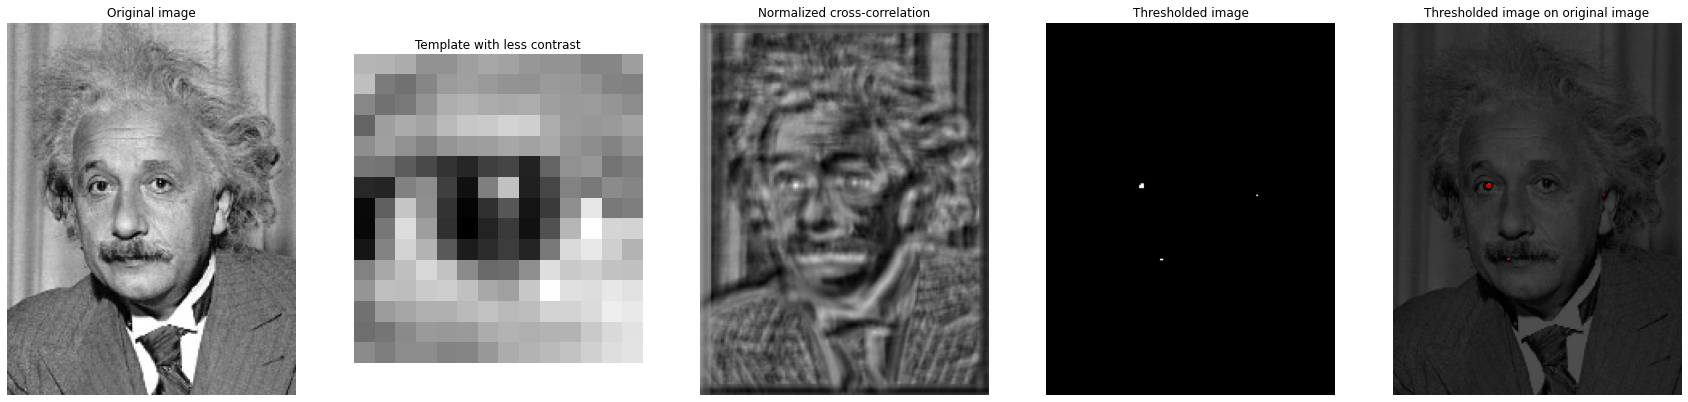

In [ ]:
# solution

#Einstein image and new template
image=io.imread('/content/drive/MyDrive/CV4/images/einstein.png')
template=io.imread('/content/drive/MyDrive/CV4/images/template_br.png')
image = color.rgb2gray(image)
template = color.rgb2gray(template)

#matching
result = feature.match_template(image,template, pad_input=True)

#visualization
fig, plots = plt.subplots(1,5, figsize=(30,14))

#original
plots[0].imshow(image , cmap='gray')
plots[0].axis("off")
plots[0].set_title("Original image")

#template
plots[1].imshow(template , cmap='gray')
plots[1].axis("off")
plots[1].set_title("Template with less contrast")

#cross-correlation
plots[2].imshow(result , cmap='gray')
plots[2].axis("off")
plots[2].set_title("Normalized cross-correlation")

#thresholded
plots[3].imshow(bw(result) , cmap='gray')
plots[3].axis("off")
plots[3].set_title("Thresholded image")

#thresholded on image
plots[4].imshow(image, cmap='gray')
plots[4].imshow(bw(result), cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[4].set_title('Thresholded image on original image')
plots[4].axis('off')

fig.show()

**Solution**

With this template we have only detected one eye and we have also detected to other points which are not eyes. Thus, with less contrast we also detect other parts.

### Exercise #3: Effect of rotation

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

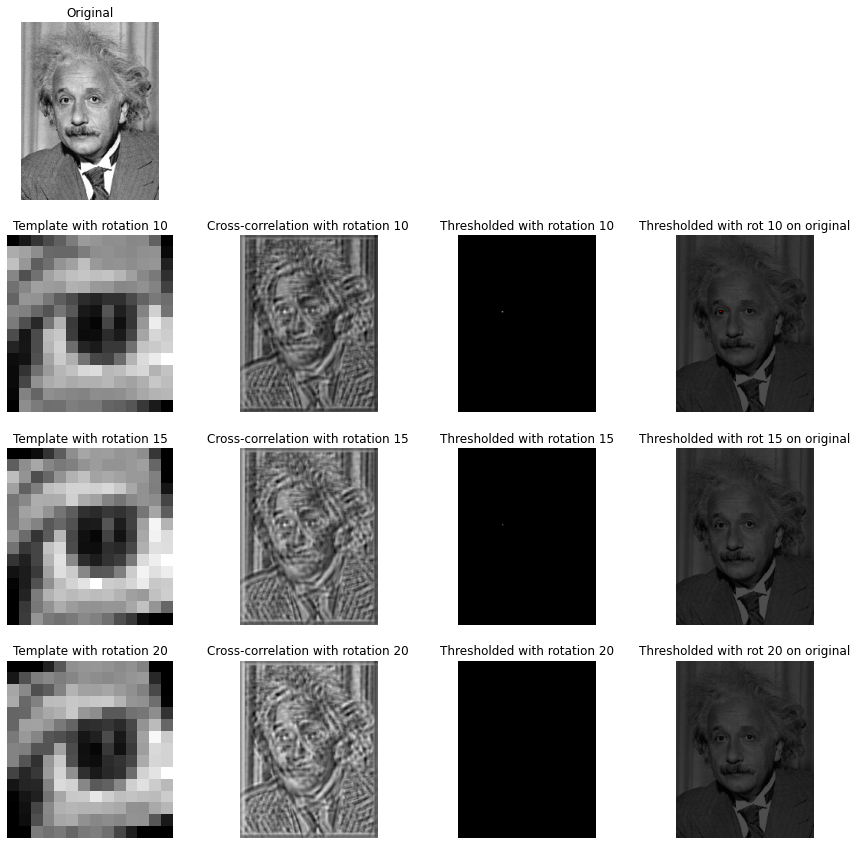

In [ ]:
# solution

#images
image=io.imread('/content/drive/MyDrive/CV4/images/einstein.png')
template=io.imread('/content/drive/MyDrive/CV4/images/template.png')
image = color.rgb2gray(image)
template = color.rgb2gray(template)

#rotations
rot10 = transform.rotate(template, 10)
rot15 = transform.rotate(template, 15)
rot20 = transform.rotate(template, 20)

#normalized cross correlations
res10 = feature.match_template(image,rot10, pad_input=True)
res15 = feature.match_template(image,rot15, pad_input=True)
res20 = feature.match_template(image,rot20, pad_input=True)

#thresholded images
thr10 = bw(res10)
thr15 = bw(res15)
thr20 = bw(res20)

#visualization
fig, plots = plt.subplots(4,4, figsize=(15,15))

#original
plots[0,0].imshow(image , cmap='gray')
plots[0,0].axis("off")
plots[0,0].set_title("Original")
plots[0,1].axis("off")
plots[0,2].axis("off")
plots[0,3].axis("off")

#rotations
plots[1,0].imshow(rot10, cmap='gray')
plots[1,0].set_title('Template with rotation 10')
plots[1,0].axis('off')
plots[2,0].imshow(rot15, cmap='gray')
plots[2,0].set_title('Template with rotation 15')
plots[2,0].axis('off')
plots[3,0].imshow(rot20, cmap='gray')
plots[3,0].set_title('Template with rotation 20')
plots[3,0].axis('off')

#normalized cross-corralation
plots[1,1].imshow(res10 , cmap='gray')
plots[1,1].axis("off")
plots[1,1].set_title("Cross-correlation with rotation 10")
plots[2,1].imshow(res15 , cmap='gray')
plots[2,1].axis("off")
plots[2,1].set_title("Cross-correlation with rotation 15")
plots[3,1].imshow(res20 , cmap='gray')
plots[3,1].axis("off")
plots[3,1].set_title("Cross-correlation with rotation 20")

#thresholded
plots[1,2].imshow(thr10 , cmap='gray')
plots[1,2].axis("off")
plots[1,2].set_title("Thresholded with rotation 10")
plots[2,2].imshow(thr15 , cmap='gray')
plots[2,2].axis("off")
plots[2,2].set_title("Thresholded with rotation 15")
plots[3,2].imshow(thr20 , cmap='gray')
plots[3,2].axis("off")
plots[3,2].set_title("Thresholded with rotation 20")

#thresholded on original
plots[1,3].imshow(image, cmap='gray')
plots[1,3].imshow(thr10, cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[1,3].set_title('Thresholded with rot 10 on original')
plots[1,3].axis('off')
plots[2,3].imshow(image, cmap='gray')
plots[2,3].imshow(thr15, cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[2,3].set_title('Thresholded with rot 15 on original')
plots[2,3].axis('off')
plots[3,3].imshow(image, cmap='gray')
plots[3,3].imshow(thr20, cmap=cl.ListedColormap(['black','red']), alpha=0.7)
plots[3,3].set_title('Thresholded with rot 20 on original')
plots[3,3].axis('off')

fig.show()

*   What do you infer with respect to rotation?

**Solution**

When we rotate the template, a variance between the original image and the template changes quickly. This is because pixels are placed in a grid and are compared with the template which is also in a grid. When rotating the template this grid also changes and pixels from the original image are not compared to its corresponding ones.
...

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Read the template ('person_template.png') from the images folder
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib

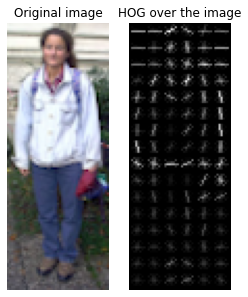

In [ ]:
# solution

#image
image = io.imread('/content/drive/MyDrive/CV4/images/person_template.bmp')

#hog
fd, hogImg = feature.hog(image, visualize=True)

#visualization
fig, plts = plt.subplots(1,2, figsize=(4,8))
plts[0].imshow(image)
plts[0].set_title('Original image')
plts[0].axis('off')
plts[1].imshow(hogImg, cmap='gray')
plts[1].set_title('HOG over the image')
plts[1].axis('off')
fig.show()

*   Explain the algorithm behind HOG



**Solution**

First we divide the image in small connected cells.Then, for each cell we calculate the local gradient histogram. 

This histogram is calculated with the gradients of each pixel of the image, which are vectors pointing in a concrete direction, we divide the directions in 8 bins covering $45^\circ$ and we compute the circular histogram for each cell.

Finally, we concatenate the histograms of the cells into blocks.


*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

In the case of this image is not necessary, as there aren't big changes of illumination or shadows.

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

Orientation is the number of bins of the histogram and so the number of different orientations considered. 

Pixels_per_cell is the size of each block where the gradient histogram is computed. 

*   Change the value of orientation (try at least 3 different values) and compare the hog_image using matplotlib subplot.

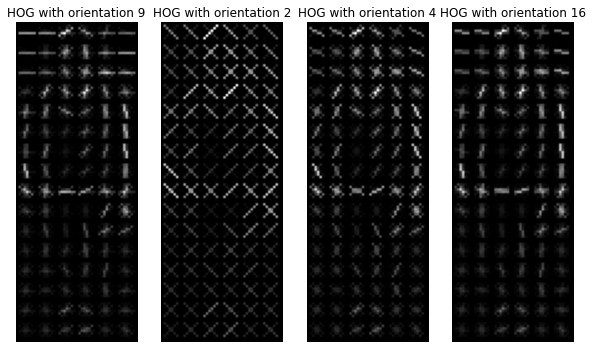

In [ ]:
# solution
fig, plts = plt.subplots(1,4, figsize=(10,16))

#default parameters, orientation=9
plts[0].imshow(hogImg, cmap='gray')
plts[0].set_title('HOG with orientation 9')
plts[0].axis('off')

#orientation=2
fd1, hogImg1 = feature.hog(image,orientations=2 ,visualize=True)
plts[1].imshow(hogImg1, cmap='gray')
plts[1].set_title('HOG with orientation 2')
plts[1].axis('off')

#orientation=4
fd2, hogImg2 = feature.hog(image,orientations=4 ,visualize=True)
plts[2].imshow(hogImg2, cmap='gray')
plts[2].set_title('HOG with orientation 4')
plts[2].axis('off')

#orientation=16
fd3, hogImg3 = feature.hog(image,orientations=16 ,visualize=True)
plts[3].imshow(hogImg3, cmap='gray')
plts[3].set_title('HOG with orientation 16')
plts[3].axis('off')
fig.show()

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

In [ ]:
#previous data to do the calculus
print('Size of feature descriptor: ', fd.size)
print('Shape image: ', image.shape)

Size of feature descriptor:  4536
Shape image:  (129, 49, 4)


**Solution**

The original image has a shape of $129 \times 49$.

If we divide the pixels in cells of $8 \times 8$ pixels we have $16 \times 6$ cells.

Each block contains $3 \times 3$ cells, thus, overlapping blocks we have $(16-2) \times (6-2) = 14 \times 4$ blocks.

And also considering that the gradient orientation is $9$ bins. We have:

$$(14 \times 4) \times (3 \times 3) \times 9 = 4536 $$


### Exercise #2: Pedestrian detection
*   For the 'person_template.png', try different values for the parameters and get the optimal value.
*   The hog descriptor obtained would be used in detecting pedestrians.
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

In the previous exercise we have tried different values for orientation, and we can see that for orientations bigger than 9 we don't notice much difference, therefore we will leave orientation by default: 9.

Now, we will try different values for pixel-per-cell:

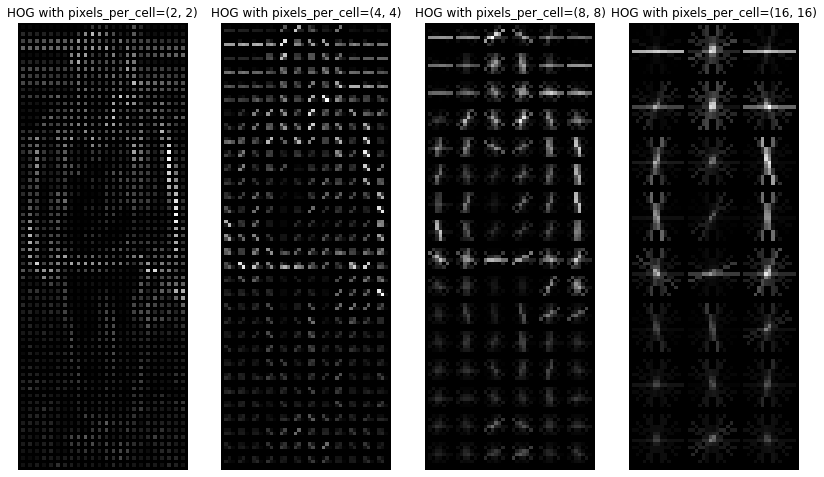

In [ ]:
# solution

image = io.imread('/content/drive/MyDrive/CV4/images/person_template.bmp')

fig, plot = plt.subplots(1,4, figsize=(14,16))

#2*2
fd1, hogImg1 = feature.hog(image, visualize=True, pixels_per_cell=(2, 2))
plot[0].imshow(hogImg1, cmap='gray')
plot[0].set_title('HOG with pixels_per_cell=(2, 2)')
plot[0].axis('off')

#4*4
fd2, hogImg2 = feature.hog(image, visualize=True, pixels_per_cell=(4, 4))
plot[1].imshow(hogImg2, cmap='gray')
plot[1].set_title('HOG with pixels_per_cell=(4, 4)')
plot[1].axis('off')

#8*8
fd3, hogImg3 = feature.hog(image, visualize=True, pixels_per_cell=(8, 8))
plot[2].imshow(hogImg3, cmap='gray')
plot[2].set_title('HOG with pixels_per_cell=(8, 8)')
plot[2].axis('off')

#16*16
fd4, hogImg4 = feature.hog(image, visualize=True, pixels_per_cell=(16, 16))
plot[3].imshow(hogImg4, cmap='gray')
plot[3].set_title('HOG with pixels_per_cell=(16, 16)')
plot[3].axis('off')

fig.show()

**Solution**

As the best parameters we will use pixels_per_cell=(8,8), we decided to use this one because it gives an idea of the shape of the body (head, arms and legs).

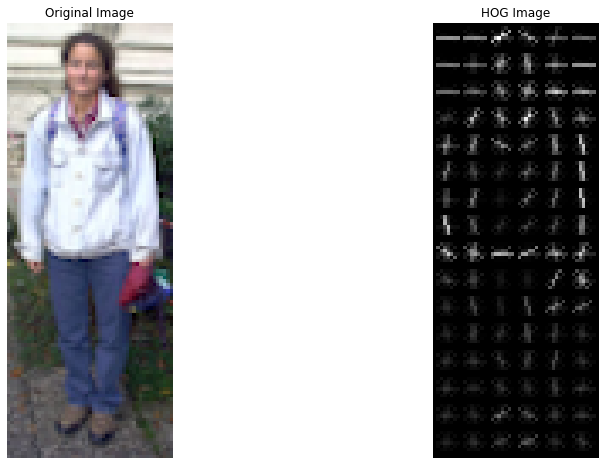

In [ ]:
#Visualization original and the chosen hog_image
fig, plot = plt.subplots(1,2, figsize=(14,8))

plot[0].imshow(image)
plot[0].set_title('Original Image')
plot[0].axis('off')

fd, hogImg = fd3, hogImg3

plot[1].imshow(hogImg, cmap='gray')
plot[1].set_title('HOG Image')
plot[1].axis('off')

fig.show()


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot along with the original image.


In [ ]:
# solution

#read the folder
pedestrians=[]
from pathlib import Path
current_dir = Path('/content/drive/MyDrive/CV4/images/pedestrians')
for path in current_dir.iterdir():
  if str(path) != '/content/drive/MyDrive/CV4/images/pedestrians/desktop.ini':
      pedestrians.append(io.imread(path))

i=0
fig, plot = plt.subplots(len(pedestrians), 3, figsize=(20,100))

for ped in pedestrians:
  min_euc=100000
  min_dot=100000

#sliding window
  for x in range(0, ped.shape[1]-image.shape[1], 5):
    for y in range(0, ped.shape[0]-image.shape[0], 5):
      window = ped[y:y+image.shape[0], x:x+image.shape[1]]
      fd2, hogImg2 = feature.hog(window, visualize=True)

#compare descriptors
      euc = np.linalg.norm(fd - fd2)
      dot = np.dot(fd, fd2)

#localization person
      if euc < min_euc:
        min_euc=euc
        best_x_euc=x
        best_y_euc=y
      if dot < min_dot:
        min_dot=dot
        best_x_dot=x
        best_y_dot=y


#visualization
  plot[i,0].imshow(ped)
  plot[i,0].set_title('Original image')
  plot[i,0].axis('off')

  plot[i,1].imshow(ped)
  rect = patches.Rectangle((best_x_euc, best_y_euc), image.shape[1], image.shape[0], edgecolor='r', facecolor='none')
  plot[i,1].add_patch(rect)
  plot[i,1].set_title('Most similar using Euclidean distance')
  plot[i,1].axis('off')

  plot[i,2].imshow(ped)
  rect = patches.Rectangle((best_x_dot, best_y_dot), image.shape[1], image.shape[0], edgecolor='r', facecolor='none')
  plot[i,2].add_patch(rect)
  plot[i,2].set_title('Most similar using dot product')
  plot[i,2].axis('off')

  i=i+1        



Output hidden; open in https://colab.research.google.com to view.

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

With Euclidean similarity it has failed 5 times whereas with the Dot product 7.

As we have only compared with one image it is normal to have a big quantity of failures as we can have a wide variety of poses, clothing,backgrounds, ilumination, different scales... Thus this is a complex problem.


*   What is the failure rate for the dot product and what is the failure rate for the euclidean distance?

**Solution**

We have a sample of 15 pictures, therefore, if with dot product there were 7 failures the rate is 7/15 or 46.7%, and if with the euclidean distance there are 5, the rate is 5/15 or 33.3%.

*   What is the difference between using dot product and euclidean distance?







**Solution**

Euclidean is the straight line distance between two points. The scalar product indirectly explains the angle between the two vectors (taking into account their magnitudes as well)
...

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

With template matching we calculate a correlation between pixels from the image and pixels from a template, whereas with HOG we compare the histograms of the gradients, which include more information.

With our programmed algorithms template matching can return any number of matching blocks while HOG only returns one sliding window.

In general HOG has more advantages, in this previous examples we have seen that it has been able to detect people in different images, while template matching only detected correctly the same eye or a very similar one.

Template matching had difficulties to deal with changes in ilumination or rotation, however, HOG, does not have problems with ilumination, as the gradient only considers the direction of contrast change, not the magnitude.



---

## **End of P2_1: Template Matching and HOG**
Deadline for P2_1 submission in CampusVirtual is: **Monday, the 1st of November, 2021**
